<IPython.core.display.Javascript object>


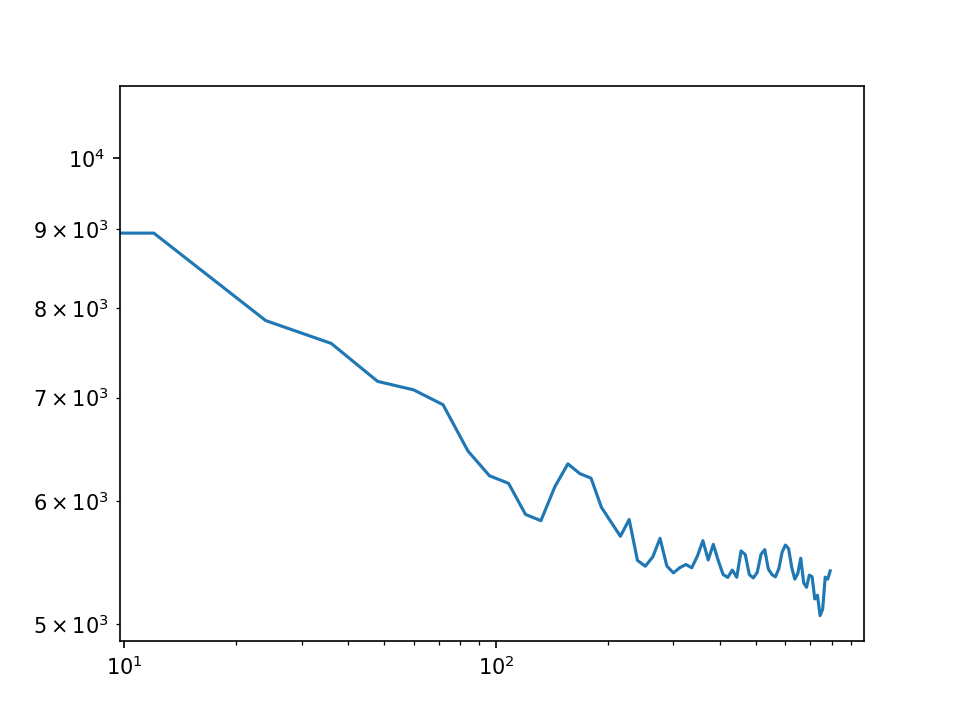

tag1 time_s time11 pop_s population ratio_s PPratio space_s w2 h2 w h rule_s rulespace rulestr x sumpop
soup time 792 pop 5409 ratio 1.0 space 1600 30 2017 624 rule lifelib b3s23 sumpop 4681620 
              total        used        free      shared  buff/cache   available
Mem:           4429        1384        2257          21         787        2788
Swap:           759           6         752


In [9]:
################ tunable parameters


input1='''

'''


#better
'''
rule lifelib b3s23 




soup time 1596 pop 4727 ratio 0.7 space 1600 30 1886 2126 rule lifelib r3b14t17s14t23
soup time 1596 pop 7242 ratio 1.0 space 1600 30 1708 1567 rule lifelib r3b14t19s14t23 



'''


#spaceships, small boiling
'''


soup time 1092 pop 3408 ratio 0.8 space 1600 30 1594 804 rule lifelib r3b14t21s14t23
soup time 1368 pop 3364 ratio 1.0 space 1600 30 1554 808 rule lifelib r3b14t20s14t23



'''

#very little of osc,stab
'''
rule lifelib r5b34t45s34t58 Bosco's Rule


'''



#no ships sometimes
'''
soup time 1596 pop 1352 ratio 1.0 space 1600 30 1532 939 rule lifelib r3b14t18s14t23
soup time 1560 pop 779 ratio 1.0 space 1600 30 1509 802 rule lifelib r3b13t17s13t20
soup time 1548 pop 2392 ratio 1.0 space 1600 30 1548 803 rule lifelib r3b13t16s12t20





soup time 1080 pop 185 ratio 0.9 space 1600 30 1275 811 rule lifelib r3b12t16s13t19 low pop


'''

#strange
'''
soup time 1596 pop 27398 ratio 1.5 space 1600 30 1750 449 rule lifelib r3b15t17s13t23 sumpop 28407936
soup time 1596 pop 48275 ratio 1.0 space 1600 30 1607 267 rule lifelib r3b15t15s12t23 sumpop 72940824 



'''




input_file1='default.rules.csv'
# input_file1='borderline1.rules.csv'
input_file1='input-borderline1.rules.csv'
input_file1='input-borderline1-Copy1.rules.csv'
input_file1='input-ltl-r2-2.rules.csv'
# input_file1='input-ltl-r2-12.rules.csv'
# input_file1='input-ltl-r2-18.rules.csv'
input_file1='input-ltl-r3-01.rules.csv'
input_file1='input-ltl-r3-03.rules.csv'




output_file1='output-2.rules.csv'
output_file1='output-borderline1-2.rules.csv'
output_file1='output-ltl-r2-02.rules.csv'
output_file1='output/viewer-ltl-r3-3.rules.csv'

#unit1=100#1250#600#1500#800#900#400#200#100#50#1000#256#128
##wt=1800##3000#2400#1800#1500#1200#900#700
w2=1600#800#200#500#400#200#100#50#1000#256#128#16#25
h2=30#w2#16
#maxtime=4*unit1 #*2
maxtime=w2//2#*2 #*4#*2
halftime=maxtime//2
##niter =wt#600#500#400#300#6##1000#500###800 # #1500
step1=12 #4 #20 #8 #15 #5 #1 #37 #2
#step2=120#12#60 #120 #1

















from __future__ import print_function
#program version 315

%matplotlib notebook
##%matplotlib inline
from matplotlib import pyplot as plt

import math
import lifelib

#
import sys


###################

plt.figure()

##plt.yscale('log')
plt.loglog()

plt.ion()
##plt.ioff()

###################


with open(output_file1,'a') as f1:
    print( file=f1)



#schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr'
schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,x,sumpop'
print(schema1.replace(',',' '))

###################



#with open(input_file1) as f0:
#     input1=f0.read()

sp0=input1.splitlines()

p1=None


for sp01 in sp0:
    
    if not sp01: continue
    
    sp5=sp01.split()
    #print(sp5)
    
    
    
    i5=sp5.index('lifelib')
    rulestr=sp5[i5+1]
    #print(rulestr)
    space1=' '
    rest1=space1.join(sp5[i5+2:])
    #print(rest1)
    
#for dbs in range(-ndbs,ndbs+1):
##for dbs in range(-1,2):
##for dbmax in range(ndbmax):

    #bmin=bmin0#+dbs
    #bmax=bmax0+dbs
    #smin=smin0#+dbs
    #smax=smax0#+dbs

    #rulestr='b3s23'
    #rulestr='r2b7t12s7t10'  ## niter <2000 or too much memory ? RADEJI ZATIM NEDAVAT DO FORUM
    #rulestr='b{}s23'.format(bmax)
    ######rulestr='r1b3t{}s3t4'.format(bmax)
    ##rulestr='r2b7t12s7t10'.format(bmax)
    #rulestr='r{}b{}t{}s{}t{}'.format(r,bmin,bmax,smin,smax)

    
    
    
    ###################

    try:
        sess = lifelib.load_rules(rulestr)
        #1/0
    except:
        exc_info1=sys.exc_info()
        #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
        print("error:", exc_info1[0], exc_info1[1])
        #raise
        continue
    
    #####################
    

    lt = sess.lifetree()

    p1=lt.pattern()
    p=0.3###08#02#05 #1#2#3#4#5 
    p1[0:h2, 0:w2] = p

    ################################

    ################################


    pops = []
    gens = []
    hs=[]
    ws=[]
    ys=[]
    
    #####p1 = p1[niter]

    population_niter = None
    sumpopeverygen=0
    
    ##currgen = 0
    ##for _ in range(int(niter/step2)):
    for currgen in range(0,  maxtime, step1):
        
        ####
        
        p1=p1[step1]
        
        ####
        sumpopeverygen += p1.population * step1
        
        if sumpopeverygen> 100e6:#500e6:
            break
        
        ####
        
        if currgen//step1 == halftime//step1:
            population=p1.population ;  population_niter = population


        pops.append(p1.population)
        gens.append(currgen)
        
        bb=p1.bounding_box
        h=1
        w=1
        if bb:
            h=bb[2]-bb[0]
            w=bb[3]-bb[1]
        hs.append(h)
        ws.append(w)
        #ys.append(p1.population/h)
        ys.append(p1.population/(1+currgen))
            
            
#     !free -m

    #######################################

    plt.plot(gens, pops)
    #plt.plot(gens, hs)
    ###plt.plot(gens, pops/hs)
#     plt.plot(gens, ys)
    plt.show()

    
    #######################################

#     bb=p1.bounding_box
#     print(bb)

#     h=1
#     w=1
#     if bb:
#         h=bb[2]-bb[0]
#         w=bb[3]-bb[1]

#     tag1='soup'
#     time_s='time'
#     time11=niter
#     pop_s='pop'
#     space_s='space'
#     rule_s='rule'
#     rulespace='lifelib'

    #print(tag1,time_s,time11,pop_s,population,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)

    #######################################

    #####p1 = p1[niter]

    #######################################

    bb=p1.bounding_box
    #print(bb)

    h=1
    w=1
    if bb:
        h=bb[2]-bb[0]
        w=bb[3]-bb[1]


    tag1='soup'
    time_s='time'
    time11=currgen  ###  maxtime
    pop_s='pop'
    population=p1.population ;  population_2niter = population
    space_s='space'
    rule_s='rule'
    rulespace='lifelib'

    ratio_s='ratio'
    ######fPPratio= population_2niter/population_niter
    #######fPPratio= population_2niter/(population_niter+1)
    fPPratio= population_2niter/(pops[currgen//step1//2]+1)
    PPratio= '{:.1f}'.format(fPPratio)
    #log2PP= '{:.1f}'.format(math.log2(fPPratio) )

    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,rest1)
    print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, 'sumpop' , sumpopeverygen,    rest1)
    with open(output_file1,'a') as f1:
        #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, file=f1)
        print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,  'sumpop' , sumpopeverygen,    rest1, file=f1)

    
    #####################################
    ##del p1
    ##del lt
    ##del sess
    #!free -m

!free -m

p1.viewer()


In [12]:
!free -m
!top -b -n 1 | grep pyt

              total        used        free      shared  buff/cache   available
Mem:           4429        1725        1717          28         986        2420
Swap:           759          23         735
 1858 martin    20   0  348356  68592  13788 S  0,0  1,5   1:50.80 jupyter-not+
 8469 martin    20   0 1306364 374348  46816 S  0,0  8,3   0:09.10 python3
 8875 martin    20   0  618376  43420  13436 S  0,0  1,0   0:00.21 python3
 9421 martin    20   0   52748  12972   7440 S  0,0  0,3   0:00.00 python3
 9902 martin    20   0   52748  12820   7284 S  0,0  0,3   0:00.00 python3
 9948 martin    20   0   52680  12856   7316 S  0,0  0,3   0:00.00 python3
 9983 martin    20   0   52756  12980   7440 S  0,0  0,3   0:00.03 python3
10482 martin    20   0 1133224 259704  24316 S  0,0  5,7   0:02.84 python3
10535 martin    20   0   52680  12880   7344 S  0,0  0,3   0:00.01 python3
10540 martin    20   0   52680  12880   7344 S  0,0  0,3   0:00.00 python3
10953 martin    20   0   52680  12884   7

In [35]:
#
import sys

try:
    sess = lifelib.load_rules('sffdsdfsfd')
    #1/0
except:
    exc_info1=sys.exc_info()
    #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
    print("error:", exc_info1[0], exc_info1[1])
    #raise

Generating code for rules ['sffdsdfsfd']...
error: <class 'ValueError'> Rule "sffdsdfsfd" does not belong to any genus


In [25]:
math.exp(0.7*math.log(2))

1.624504792712471